 ## 1. TITLE
 Predicting Heart Diseases

### 1.1 Purpose
Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.

The purpose of this project is to create a classification model to predict the probability that a person will or will not have heart disease.

### 1.2 Content
- General Data Analysis 
- Principal factors of heart diseases
- Techniques to handle unbalanced data
- Machine learning process for a classification problem :data pre-processing and optimization


### 1.3 Limitations
-  Cannot use classification models such as SVM, neural networks, ensemble methods due to the cost of computational efficency.
- Cannot use Grid Search method  due to the cost of computational efficency


## 2. SET UP

### 2.1. Libraries

In [211]:

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px

# Model Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

# Transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer

#Counts
from collections import Counter

# Resamples for unbalanced data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as pip
# Warnings
import warnings
warnings.filterwarnings("ignore")


## 3. Data

### 3.1 Data import

Heart Disease data set from kaggle website

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories

### 3.2 Data Describe

- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

- BMI: Body Mass Index (BMI).

- Smoking: Have you smoked at least 100 cigarettes in your entire life?

- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

- Stroke: (Ever told) (you had) a stroke?

- PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

- MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

- DiffWalking: Do you have serious difficulty walking or climbing stairs?

- Sex: Are you male or female?

- AgeCategory: Fourteen-level age category. (then calculated the mean)
- Race: Imputed race/ethnicity value.

- Diabetic: (Ever told) (you had) diabetes?

- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

- GenHealth: Would you say that in general your health is...

- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?

- Asthma: (Ever told) (you had) asthma?

- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

- SkinCancer: (Ever told) (you had) skin cancer?


In [2]:
df=pd.read_csv("heart_2020.csv")
display(df.head())

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3.3 Data Cleaning and Preprocesing for analysis

Boolean strings must be converted to Boolean for more efficient analysis and modeling.

In addition, we have an age category. These categories are converted into numbers using the average of each age category.

In [3]:

# Code to convert the strings into booleans.
cbol=["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Diabetic","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]
for i in cbol:
    df[i] = df[i].map({"No":0, "Yes":1}).astype("bool")

df["Sex"] = df["Sex"].map({"Female":0, "Male":1}).astype("bool")

# Code to convert age categories into floats
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')
df['Race'] = df['Race'].astype('category')
df['GenHealth'] = df['GenHealth'].astype('category')

### 3.4 Data Analysis

#### 3.4.1 General Analysis

In [4]:
# General Statistics
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


We note that the patients are mostly healthy. BMI, physical and mental health and average hours of sleep within medical recommendations.

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

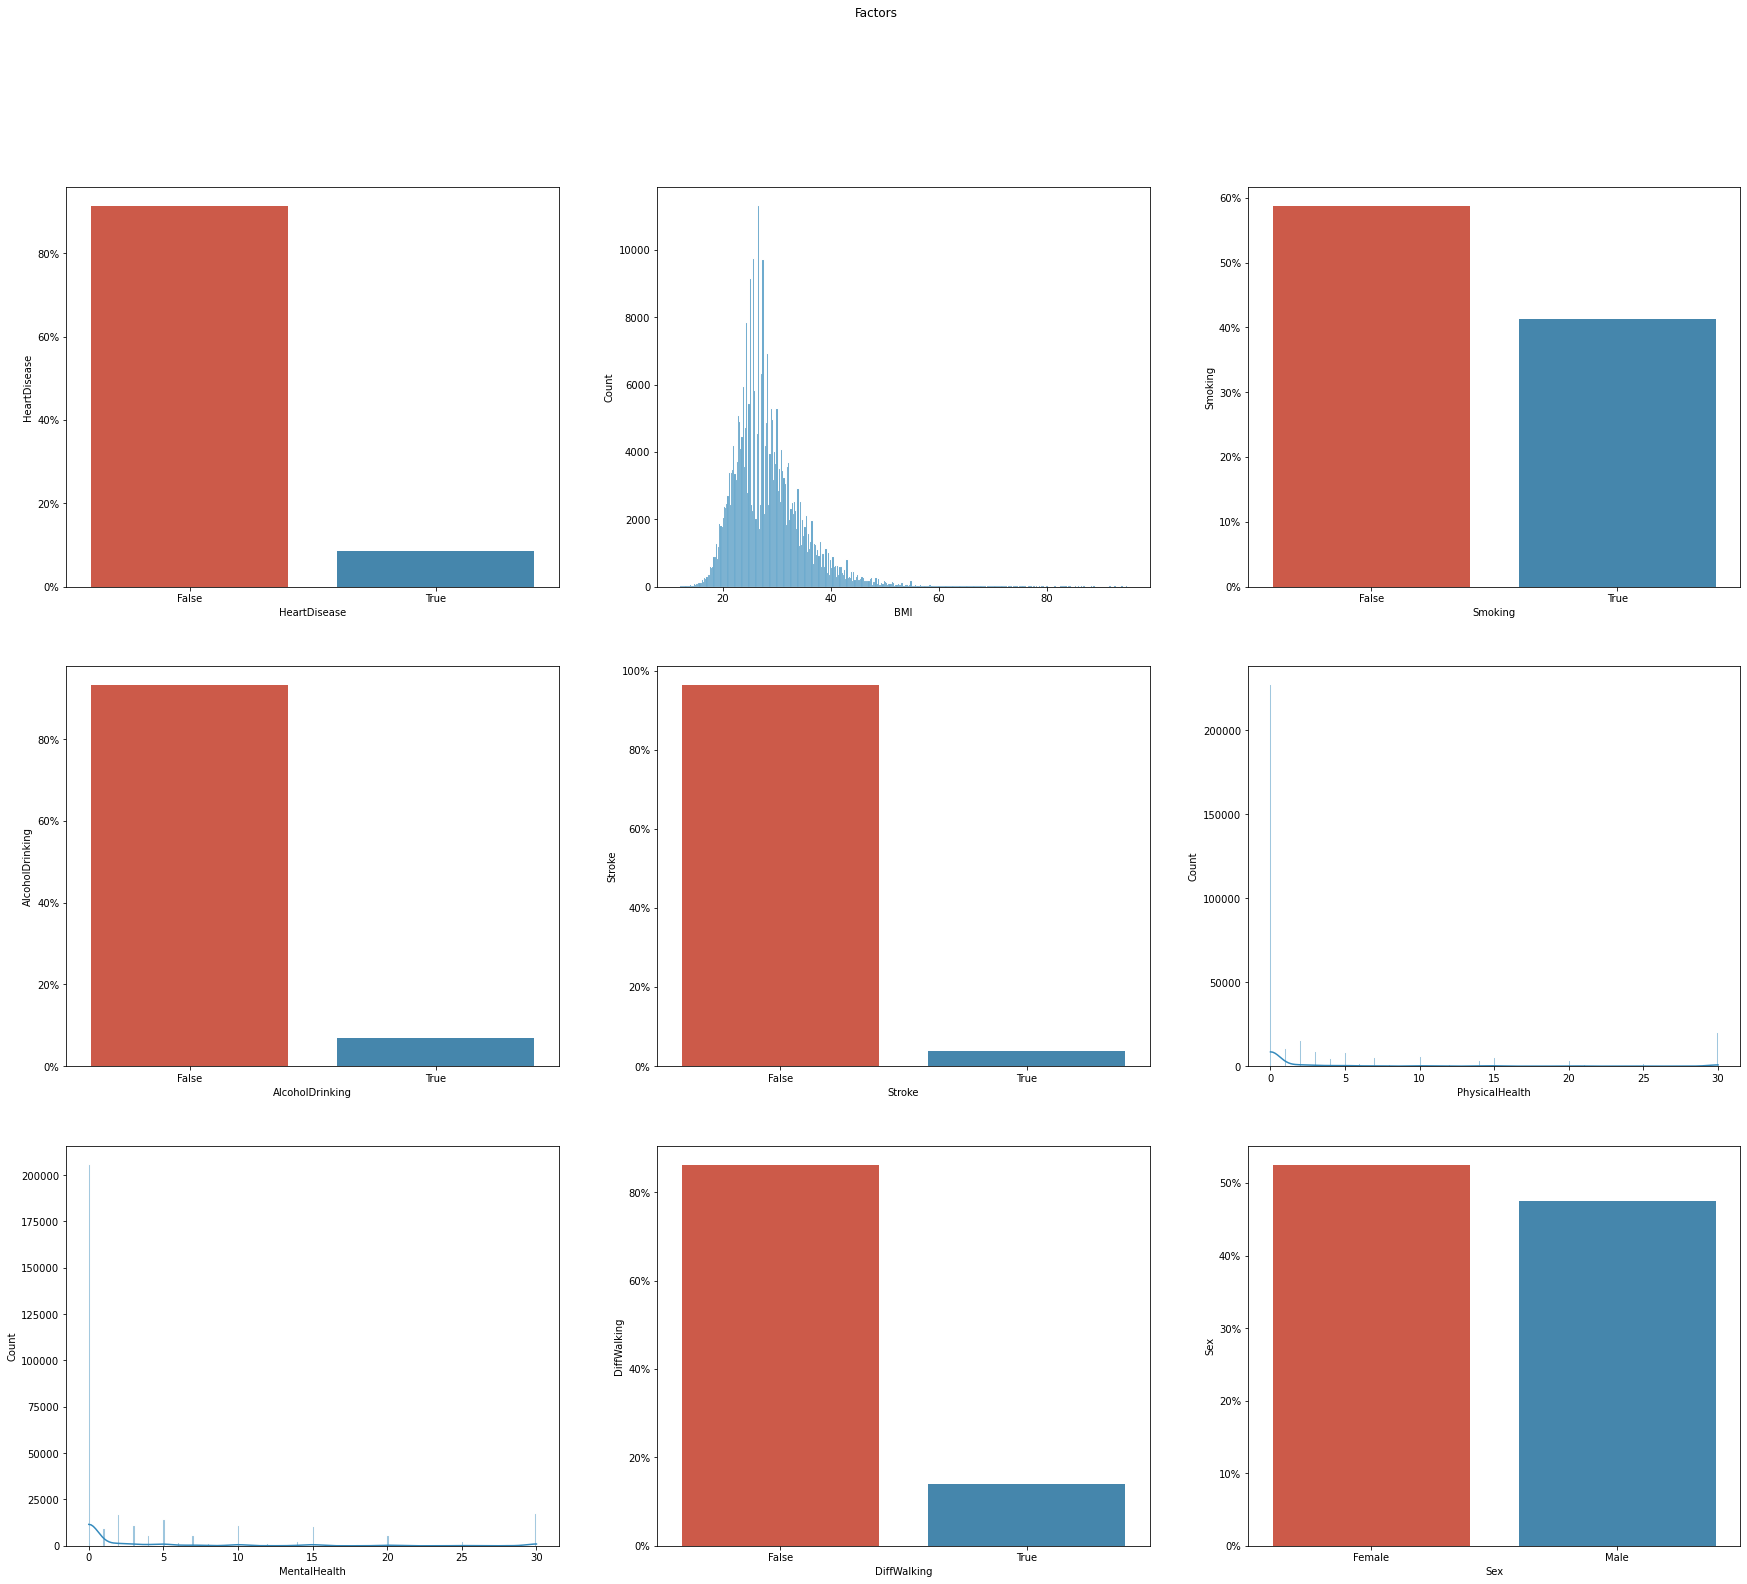

In [7]:
fig, axes = plt.subplots(3,3, figsize=(30, 25))
plt.style.use('ggplot')

fig.suptitle('Features')

ax=sns.barplot(ax=axes[0, 0], data=df, x="HeartDisease",y="HeartDisease",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

sns.histplot(ax=axes[0, 1], data=df, x="BMI")

ax1=sns.barplot(ax=axes[0, 2], data=df, x="Smoking",y="Smoking",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)

ax2=sns.barplot(ax=axes[1,0], data=df, x="AlcoholDrinking",y="AlcoholDrinking",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)

ax3=sns.barplot(ax=axes[1, 1], data=df, x="Stroke",y="Stroke",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax3.yaxis.set_major_formatter(yticks)

sns.histplot(ax=axes[1, 2], data=df, x="PhysicalHealth",kde=True)
sns.histplot(ax=axes[2, 0], data=df, x="MentalHealth",kde=True)

ax4=sns.barplot(ax=axes[2, 1], data=df, x="DiffWalking",y="DiffWalking",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax4.yaxis.set_major_formatter(yticks)

ax5=sns.barplot(ax=axes[2, 2], data=df, x="Sex",y="Sex",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax5.yaxis.set_major_formatter(yticks)
ax5.set_xticklabels(['Female',"Male"])


- High percentage of smokers among patients, about 42%.
- More women than men, but with a small difference.
- There are not a large number of patients who consume alcohol.
- We can observed that the variable to be predicted is not balanced. A difference in the range of 92% vs 8% 


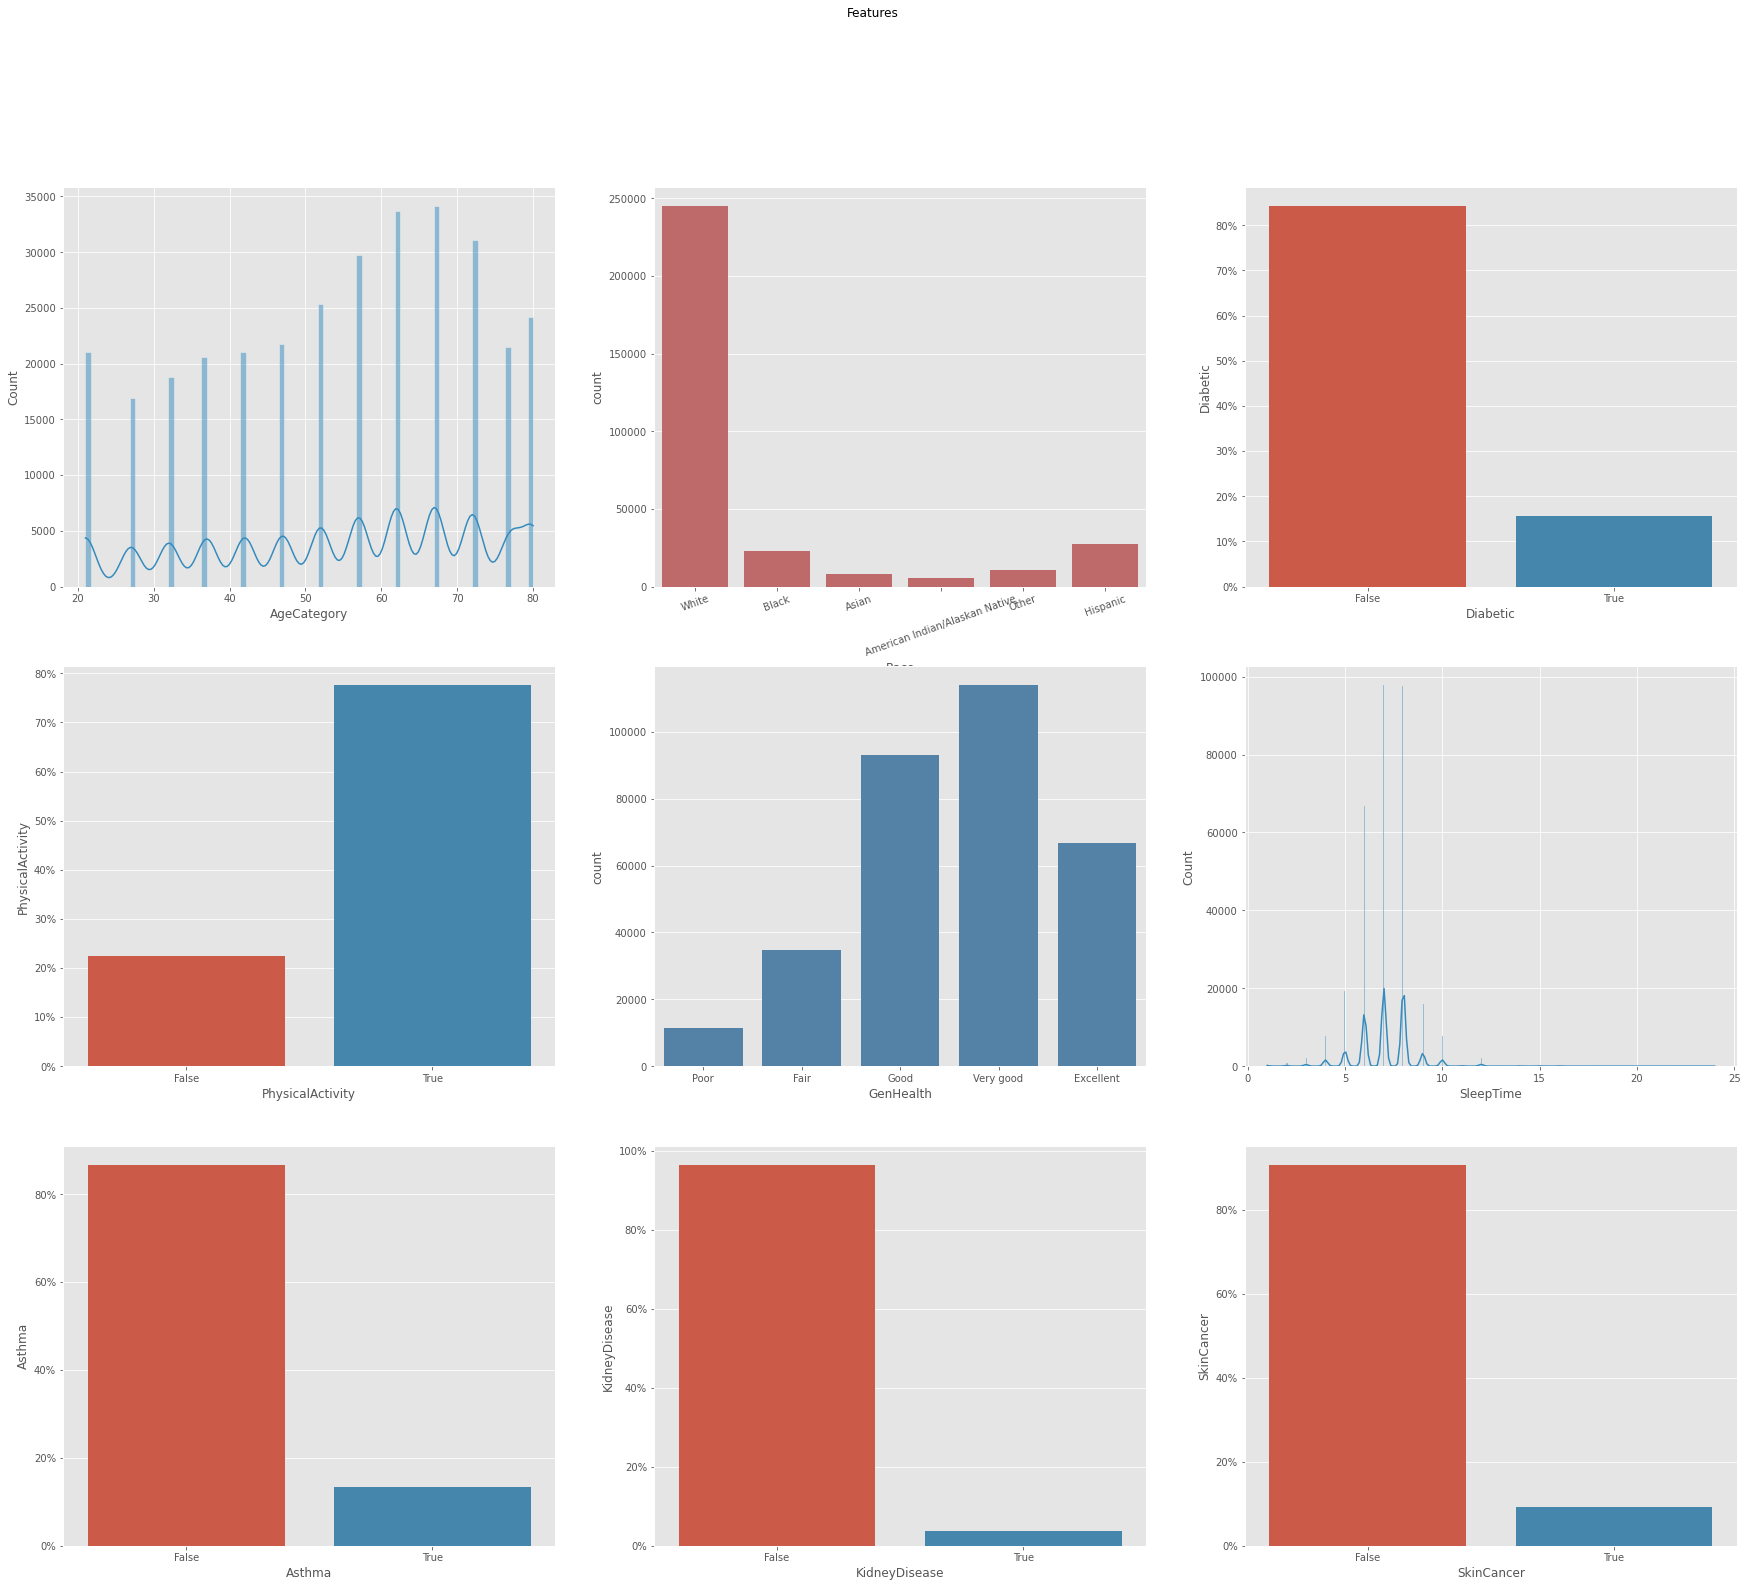

In [8]:
fig1, axes1 = plt.subplots(3,3, figsize=(30, 25))

fig1.suptitle('Features')


ax6=sns.histplot(ax=axes1[0, 0],data=df,x="AgeCategory",kde=True)


ax8=sns.countplot(ax=axes1[0, 1],data=df,x="Race",color="indianred")
ax8.set_xticklabels(df.Race.unique(),rotation=20)
ax7=sns.barplot(ax=axes1[0, 2], data=df, x="Diabetic",y="Diabetic",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax7.yaxis.set_major_formatter(yticks)

ax9=sns.barplot(ax=axes1[1, 0], data=df, x="PhysicalActivity",y="PhysicalActivity",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax9.yaxis.set_major_formatter(yticks)

ord=['Poor','Fair','Good','Very good', 'Excellent']
sns.countplot(ax=axes1[1, 1],data=df,x="GenHealth",color="steelblue",order=ord)

sns.histplot(ax=axes1[1, 2], data=df, x="SleepTime",kde=True)


ax10=sns.barplot(ax=axes1[2, 0], data=df, x="Asthma",y="Asthma",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax10.yaxis.set_major_formatter(yticks)

ax11=sns.barplot(ax=axes1[2, 1], data=df, x="KidneyDisease",y="KidneyDisease",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax11.yaxis.set_major_formatter(yticks)

ax12=sns.barplot(ax=axes1[2, 2], data=df, x="SkinCancer",y="SkinCancer",estimator=lambda x: len(x) / len(df) * 100)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax12.yaxis.set_major_formatter(yticks)


- The age of the patients is varied, ranging from 18 to 80 years old.
- In general, diseases such as asthma, diabetes, skin cancer do not exceed 20% of the data.
- Predominantly white people


#### 3.4.2 Exploratory Data Analysis for Heart Diseases Indicators

We review the main factors that increase the probability of heart disease

<AxesSubplot:xlabel='SkinCancer', ylabel='HeartDisease'>

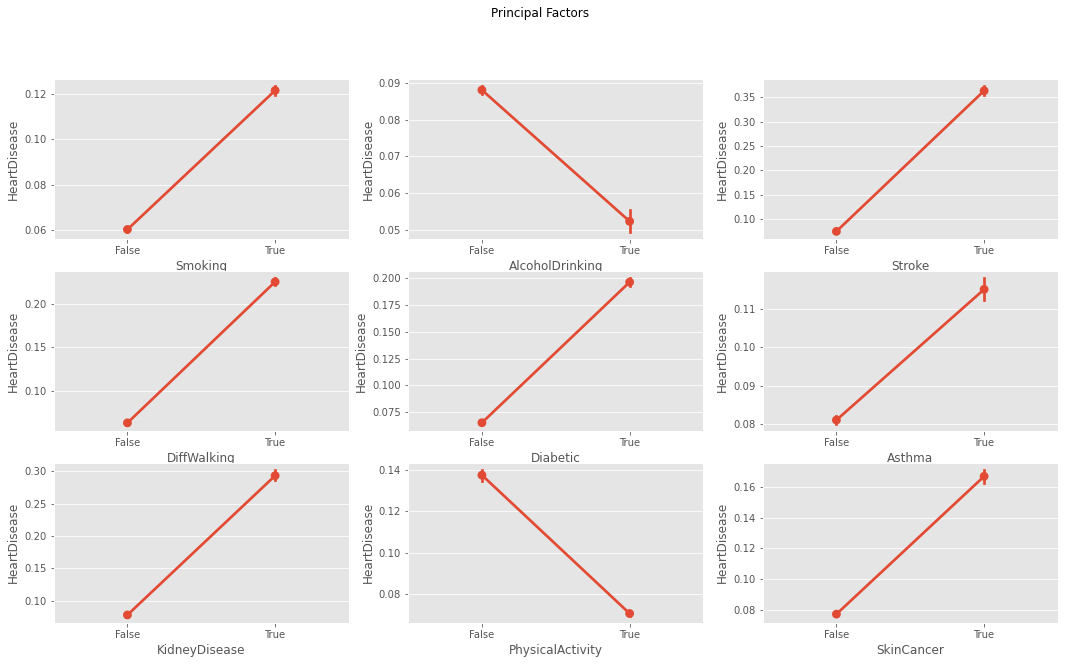

In [9]:
figg, axess = plt.subplots(3, 3, figsize=(18, 10))
figg.suptitle('Principal Factors')
sns.pointplot(ax=axess[0, 0], data=df, x='Smoking', y="HeartDisease")
sns.pointplot(ax=axess[0, 1], data=df, x="AlcoholDrinking", y="HeartDisease")
sns.pointplot(ax=axess[0, 2], data=df, x="Stroke", y="HeartDisease")
sns.pointplot(ax=axess[1, 0], data=df, x='DiffWalking', y="HeartDisease")
sns.pointplot(ax=axess[1, 1], data=df, x='Diabetic', y="HeartDisease")
sns.pointplot(ax=axess[1, 2], data=df, x='Asthma', y="HeartDisease")
sns.pointplot(ax=axess[2, 0], data=df, x='KidneyDisease', y="HeartDisease")
sns.pointplot(ax=axess[2, 1], data=df, x='PhysicalActivity', y="HeartDisease")
sns.pointplot(ax=axess[2, 2], data=df, x='SkinCancer', y="HeartDisease")

- We observed that smoking increases the probability of heart problems while physical activity reduces the probability of heart disease. Interesting to find that alcohol is not significant in the increase of these problems.
- People with other types of diseases increase the probability, such as asthma, diabetes and skin cancer. However, kidney and stroke diseases are the main factors that increase the probability of heart problems.
- It makes sense that a failure in one organ would have an effect on another organ.


¿Does the gender of a person increase the probabilty of having any heart diseases?

<AxesSubplot:xlabel='SkinCancer', ylabel='HeartDisease'>

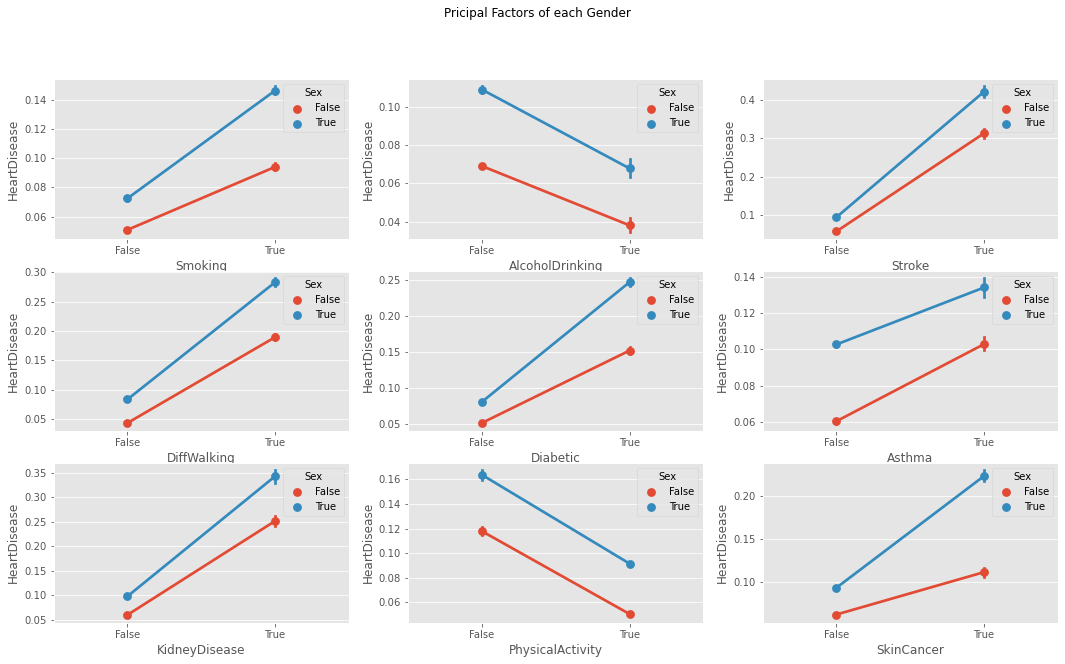

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
plt.style.use('ggplot')

fig.suptitle('Principal Factors for each Gender ')

sns.pointplot(ax=axes[0, 0], data=df, x='Smoking', y="HeartDisease", hue="Sex")
sns.pointplot(ax=axes[0, 1], data=df, x="AlcoholDrinking", y="HeartDisease", hue="Sex")
sns.pointplot(ax=axes[0, 2], data=df, x="Stroke", y="HeartDisease", hue="Sex")
sns.pointplot(ax=axes[1, 0], data=df, x='DiffWalking', y="HeartDisease", hue="Sex")
sns.pointplot(ax=axes[1, 1], data=df, x='Diabetic', y="HeartDisease", hue="Sex")
sns.pointplot(ax=axes[1, 2], data=df, x='Asthma', y="HeartDisease", hue="Sex")
sns.pointplot(ax=axes[2, 0], data=df, x='KidneyDisease', y="HeartDisease", hue="Sex")
sns.pointplot(ax=axes[2, 1], data=df, x='PhysicalActivity', y="HeartDisease", hue="Sex")
sns.pointplot(ax=axes[2, 2], data=df, x='SkinCancer', y="HeartDisease", hue="Sex")

•	We can indeed corroborate that the sex of a person increases the probability of heart disease. In this case men have a higher probability than women.

Does the race affect in the probability of heart diseases?

[None, None, None, None, None, None, None, None, None, None, None, None]

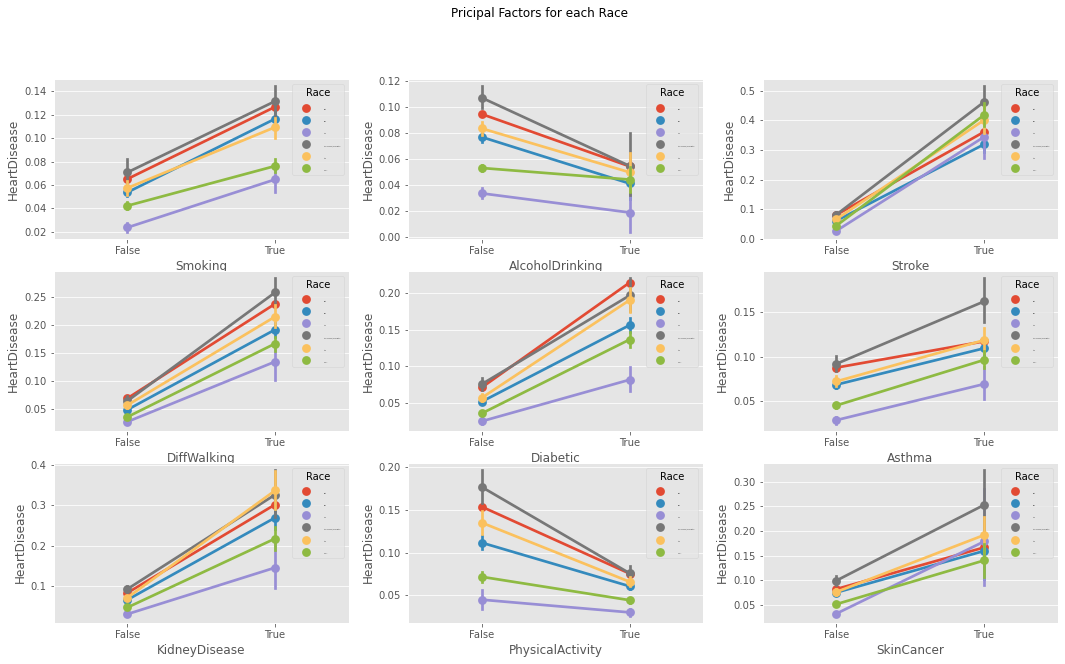

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
plt.style.use('ggplot')

fig.suptitle('Principal Factors for each Race')

ax=sns.pointplot(ax=axes[0, 0], data=df, x='Smoking', y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[0, 1], data=df, x="AlcoholDrinking", y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[0, 2], data=df, x="Stroke", y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=ax=sns.pointplot(ax=axes[1, 0], data=df, x='DiffWalking', y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[1, 1], data=df, x='Diabetic', y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[1, 2], data=df, x='Asthma', y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[2, 0], data=df, x='KidneyDisease', y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[2, 1], data=df, x='PhysicalActivity', y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[2, 2], data=df, x='SkinCancer', y="HeartDisease", hue="Race",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')

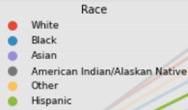


- Those with the highest probability are American Indian or Alaska Native while Asians have the lowest probability.
- It is important to remember that the majority of patients are white.


¿Does the Gen Health affect the Probability of heat diseases?

[None, None, None, None, None, None, None, None, None, None]

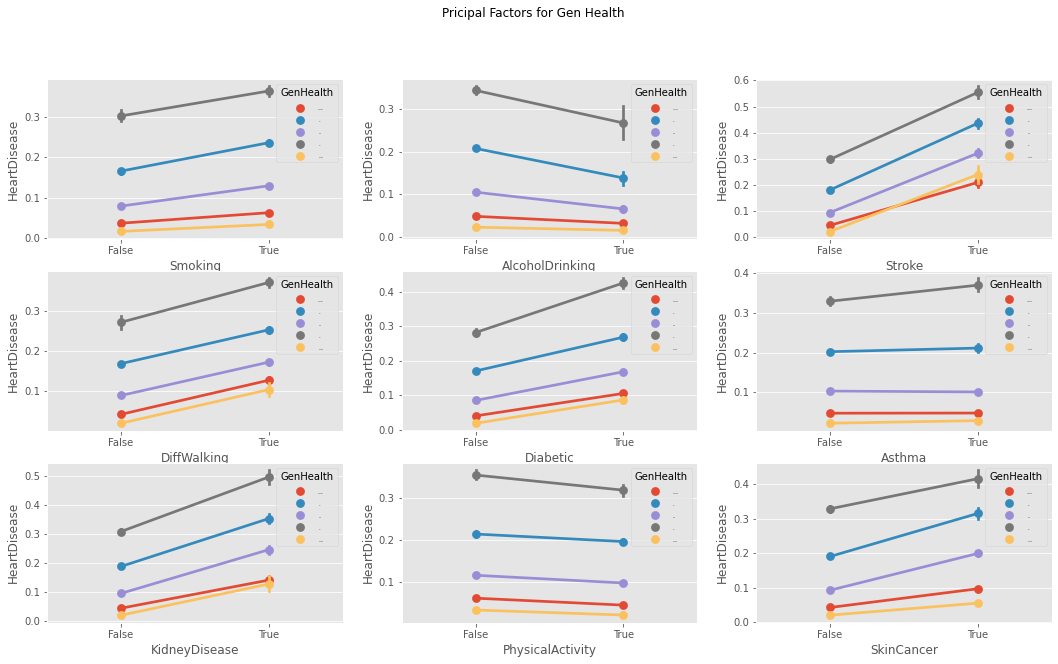

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
plt.style.use('ggplot')

fig.suptitle("Principal Factors for Gen Health")

ax=sns.pointplot(ax=axes[0, 0], data=df, x='Smoking', y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[0, 1], data=df, x="AlcoholDrinking", y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[0, 2], data=df, x="Stroke", y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=ax=sns.pointplot(ax=axes[1, 0], data=df, x='DiffWalking', y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[1, 1], data=df, x='Diabetic', y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[1, 2], data=df, x='Asthma', y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[2, 0], data=df, x='KidneyDisease', y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[2, 1], data=df, x='PhysicalActivity', y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')
ax=sns.pointplot(ax=axes[2, 2], data=df, x='SkinCancer', y="HeartDisease", hue="GenHealth",legend=False)
plt.setp(ax.get_legend().get_texts(), fontsize='0')


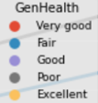

- As expected, physical fitness improves the probabilty of having any heart problems.

¿How does BMI behave between patients with heart disease and those without?

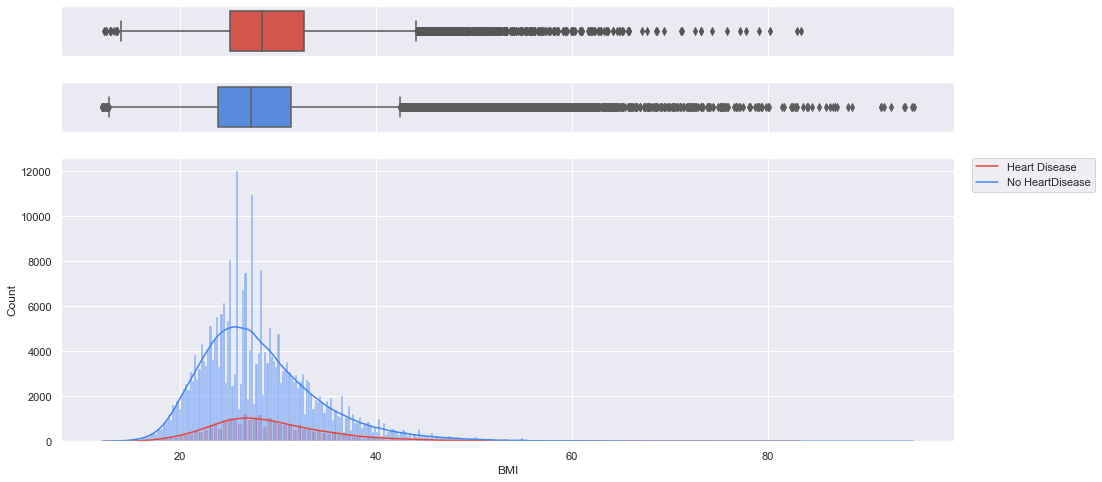

In [18]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']==1]["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']==1], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HeartDisease']==0]["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']==0], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()





- It can be seen in the graph that people with heart problems tend to have a slightly higher BMI but it is not significant.


¿Does the AgeCategory increase the probability of heart diseases?

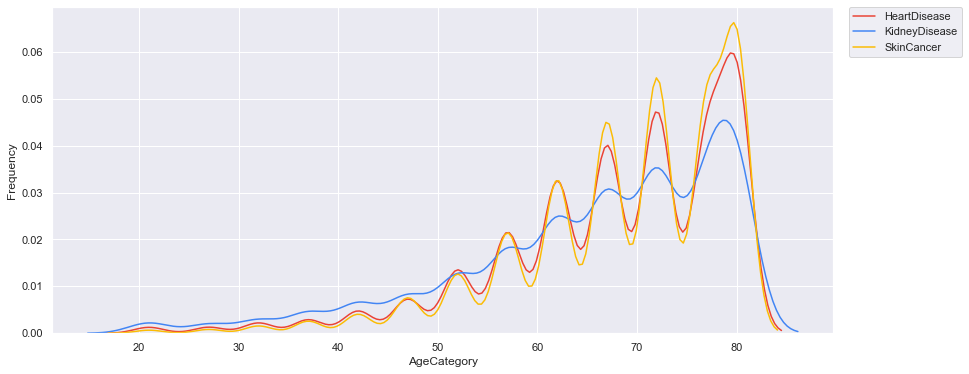

In [20]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HeartDisease"]==1]["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]==1]["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]==1]["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

- The graph shows that the higher the age, the higher the frequency of problems in general, not only heart diseases

### 4.Modeling (Predicting Heart Diseases)

Knowing that we are working with unbalanced data. The following methodology will be used:
- Pre-processing of the data according to the type of variable .
- The logistic regression model is used as a base model.
- Calculate the metrics for model efficiency.
- Using techniques for unbalanced data like  unsampling and over saampling to generate new data to train the model again.
- Comparison of the logistic regression with other models.
- Optimization of parameters.


#### 4.1 Preprocesing for a Classification model

The type of preprocessing will depend on the type of variable:
- For booleans, no specific type of preprocessing is required.
- For numbers we need to scale and standardize the data by using StandardScaler().
- For categories we are going to convert them into numbers by using OneHotEncoder()

We are going to create two functions in order to pre-process the data within the skit learn pipeline:
- TypeSelector() receives a variable type and extracts the columns of that variable type inside the dataframe.
- StringIndex() for labeling each string

In [216]:
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])

In [217]:
class StringIndexer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.apply(lambda s: s.cat.codes.replace(
            {-1: len(s.cat.categories)}
        ))

In [235]:
seed=123
## Pipeline for modeling
pipe = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
        ])),  # boolean close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('scaler', StandardScaler()),
        ])),  # numerical close
        
        # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]))  # categorical close
    ])),  # features close
     ("LR",LogisticRegression(random_state=seed))])  # pipeline close

#### 4.2 Modeling and Scoring 

The following two functions are to calculate the log loss score and all the scores to convert them into a data frame

In [219]:
## Log loss fuction
def log_loss(predicted,actual,eps=1e-14):

 predicted=np.clip(predicted,eps,1-eps)
 loss=-1*np.mean(actual*np.log(predicted)
                +(1-actual)
                *np.log(1-predicted))

 return loss

In [230]:
##Function for all metrics as a df
def evaluate_model(model,name,x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    log__loss=log_loss(y_pred_proba,y_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Display as a df
    dic={"Model":[name],'Accuracy': [acc], 'Precision': [prec], 'Rec': [rec], "F1": [f1], 'Kappa': [kappa],"log_loss":[log__loss],
         'AUC': [auc], 'Confusion Matrix': [cm]}
    df = pd.DataFrame.from_dict(dic).set_index(["Model"])
    display(df)
    return {"df":df,'fpr': fpr, 'tpr': tpr}

In [10]:
# Setting X and Y  variables
X= df.drop(["HeartDisease"],axis=1)
y=df["HeartDisease"]

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state= seed,stratify=y)

In [11]:
#Fitting and scoring
pipe.fit(X_train,y_train)
Logistic_eval=evaluate_model(pipe,X_test,y_test)




,Accuracy,Precision,Rec,F1,Kappa,log_loss,AUC,Confusion Matrix
Model,,,,,,,,
LogisticRegression(random_state=42),0.916249,0.55514,0.1085,0.181522,0.157954,0.227703,0.838455,"[[87013, 714], [7321, 891]]"


The Acurracy Paradox can be observed in the scores when working with unbalanced data. This means that we have a very high accuracy but a very poor model performance.

This can be seen in the number of false positives. The model does not predict correctly if a person has a heart problem.

To try to solve the problem, we will use oversampling and undersampling methods.

#### 4.3 Undersampling and Oversampling Methods

We will use RandomUnderSampler() for the undersampling method and SMOTENC for oversampling since the variables are  categoricals and numbers.

In [236]:

# FOR UNDERSAMPLING
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state= seed,stratify=y)
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=seed)
# fit and apply the transform
X_train_under, y_train_under= undersample.fit_resample(X_train, y_train)
# summarize class distribution
print("Before undersampling: ", Counter(y_train_under))
#Fit and evaluate
pipe.fit(X_train_under,y_train_under)
pipe_eval=evaluate_model(pipe,'Logistic Regression',X_test,y_test)

      
#FOR OVERSAMPLING
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state= seed,stratify=y)
# define oversampling strategy
SMOTE = SMOTENC(categorical_features=[9,12],random_state=seed)
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
# summarize class distribution
print("Before oversampling: ",Counter(y_train_SMOTE))
#fit and evaluate
pipe.fit(X_train_SMOTE,y_train_SMOTE)
pipe_eval=evaluate_model(pipe,'Logistic Regression',X_test,y_test)

#COMBINATION OF BOTH UNDER AND OVER
 #Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state= seed,stratify=y)
# define oversampling and undersampling strategy with a pipeline
SMOTE = SMOTENC(categorical_features=[9,12],sampling_strategy=0.4,random_state=seed)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=seed)
step = [('o', SMOTE), ('u', under)]
pipeline = pip(steps=step)
# fit and apply the transform
X_train_UNOV, y_train_UNOV = pipeline.fit_resample(X_train, y_train)
print("Before over+under sampling: ",Counter(y_train_UNOV))
#Fit and evaluate
pipe.fit(X_train_UNOV,y_train_UNOV)
pipe_eval=evaluate_model(pipe,'Logistic Regression',X_test,y_test)

Before undersampling:  Counter({False: 19161, True: 19161})


,Accuracy,Precision,Rec,F1,Kappa,log_loss,AUC,Confusion Matrix
Model,,,,,,,,
Logistic Regression,0.751644,0.22504,0.77813,0.349114,0.249449,0.502437,0.840313,"[[65722, 22005], [1822, 6390]]"


Before oversampling:  Counter({False: 204695, True: 204695})


,Accuracy,Precision,Rec,F1,Kappa,log_loss,AUC,Confusion Matrix
Model,,,,,,,,
Logistic Regression,0.797945,0.241689,0.636508,0.350347,0.258321,0.43478,0.812247,"[[71327, 16400], [2985, 5227]]"


Before over+under sampling:  Counter({False: 163756, True: 81878})


,Accuracy,Precision,Rec,F1,Kappa,log_loss,AUC,Confusion Matrix
Model,,,,,,,,
Logistic Regression,0.857211,0.298967,0.496834,0.373302,0.298306,0.327533,0.822664,"[[78160, 9567], [4132, 4080]]"


What metric to use to compare the model? Well, it depends: which costs more? false positives or false negatives?

In our case we are trying to predict heart disease, it is very clear that we do not want false negatives since patients who may have a serious disease would be treated as if they did not have the disease.

However, we do not want false positives either, since a high number of false positives would generate confusion as to which people have heart disease and the model would become useless.

The best option would be a balanced model and this is achieved by checking three metrics:
F1, log loss, ROC AUC. A combination of these and a review of the most optimal confusion  matrix is necessary for model selection.

But we are missing an esencial concept, CROSS VALIDATION!

When you use cross validation in machine learning, you verify how accurate your model is on multiple and different subsets of data. Therefore, you ensure that it generalizes well to the data that you collect in the future. It improves the accuracy of the model.

In this case we will skip undersamplig method, because it drastically reduces the number of records and its performance is poor in the metrics mentioned above.

We will continue with the SMOTE method and the combination of under and over sampling to optimize models and come to the conclusion of which method is the most efficient.

####  4.4 Model Optimization

Lets try to change and add some techniques into the pipeline first. What could happend if we scale all the variables after transform each of them?.
Also we are going to add one more technique to the pipeline called Power transform(). This technique reduces the skewness of the numeric data to make it more Gaussian-like.


In [222]:

pipe = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
        ])),  # boolean close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('transformer',PowerTransformer(method="yeo-johnson")),
        ])),  # numerical close
        
        # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]))  # categorical close
    ])),  # features close
     ('scaler', StandardScaler(with_mean=False)),

     ("LR",LogisticRegression(random_state=seed))])  # pipeline close

Now let's focus first on the SMOTE method first.

We are going to use cross validation to check the SMOTE metrics with different base models.


In [223]:
SMOTE = SMOTENC(categorical_features=[9,12],random_state=seed)
# fit and apply the transform
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X,y)

In [234]:
#Empty list and df
results =pd.DataFrame()
names = []

#Append models
modelsC=[]
modelsC.append(LogisticRegression())
modelsC.append(DecisionTreeClassifier())
modelsC.append(SGDClassifier(loss='log'))
modelsC.append(GradientBoostingClassifier())
modelsC.append(xgb.XGBClassifier(objetive="binary:logistic",verbosity = 0))

#Append names
names=[]
names.append('Logistic Regression')
names.append('Decision Tree')
names.append('SDGClassifier')
names.append('GB Classifier')
names.append('XGBClassifier')

for i in range(len(modelsC)):
    
 pipe = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        # Part 1
        ('boolean', Pipeline([
            
            ('selector', TypeSelector('bool')),
        ])),  # boolean close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('transformer',PowerTransformer(method="yeo-johnson")),
        ])),  # numerical close
        
        # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]))  # categorical close
    ])),  # features close
     ('scaler', StandardScaler(with_mean=False)),

     ("LR",modelsC[i])
 
 ])  # pipeline close
    
    
    
 result = cross_validate(pipe,X_SMOTE, y_SMOTE, cv=5, scoring=('neg_log_loss','roc_auc','f1'), return_train_score=True)
 
 dic= {'Model':names[i],'train log_loss':result['train_neg_log_loss'].mean(),
       'test log_loss':result['test_neg_log_loss'].mean(), 'train ROC AUC':result['train_roc_auc'].mean(),
       'test ROC AUC':result['test_roc_auc'].mean(), 'train f1':result['train_f1'].mean(),
       'test f1':result['test_f1'].mean()
           
       }
    
 results=results.append(dic,ignore_index=True)

#Print the data frame
display(results.set_index('Model').style.highlight_max(color = 'lightgreen', axis = 0))

,test ROC AUC,test f1,test log_loss,train ROC AUC,train f1,train log_loss
Model,,,,,,
Logistic Regression,0.896331,0.815204,-0.409865,0.897588,0.817544,-0.404498
Decision Tree,0.875678,0.873604,-4.273352,0.999987,0.997715,-0.003991
SDGClassifier,0.896266,0.811466,-0.412374,0.896859,0.813744,-0.407664
GB Classifier,0.929246,0.848083,-0.348842,0.931163,0.852391,-0.342098
XGBClassifier,0.956300,0.880495,-0.282542,0.963208,0.893879,-0.247183


Using different base models and remembering the limitation of not being able to use more complex models, we find that XGB is the most optimal.

If we look at the XGB metrics we find that it is a model with lower log loss, higher f1 score and higher ROC AUC for the test data. The Decision tree has overfitting because can see the the train scores are significally higher than the test scores.

For this case, whe are going to change the Logistic Regression to XGB Classifier frrom the pipeline

Let's try to optimize the parameters of the XBG to see the final performance with SMOTE method.

In [225]:
pipe = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
        ])),  # boolean close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('transformer',PowerTransformer(method="yeo-johnson")),
        ])),  # numerical close
        
        # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]))  # categorical close
    ])),  # features close
     ('scaler', StandardScaler(with_mean=False)),

     ("LR",xgb.XGBClassifier(objetive="binary:logistic",verbosity = 0))])  # pipeline close

In [226]:
params = {
    'LR__max_depth': range (2, 10, 1),
    'LR__n_estimators': range(60, 220, 40),
    'LR__learning_rate': [0.1, 0.01, 0.05],
    'LR__min_child_weight': [1, 5, 10],
    'LR__gamma': [0.5, 1, 1.5, 2, 5],
    'LR__subsample': [0.6, 0.8, 1.0],
    'LR__colsample_bytree': [0.6, 0.8, 1.0],
}
# define search
search =  RandomizedSearchCV(pipe, params, scoring='neg_log_loss', n_jobs=-1,cv=5)
# execute search

result = search.fit(X_SMOTE, y_SMOTE)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.30980443523768547
Best Hyperparameters: {'LR__subsample': 0.6, 'LR__n_estimators': 140, 'LR__min_child_weight': 10, 'LR__max_depth': 5, 'LR__learning_rate': 0.1, 'LR__gamma': 1.5, 'LR__colsample_bytree': 1.0}


For our case in particular, the model was optimized to reduce the log loss by 0.30. Now, let's do the same procedure but this time with the combination of the SMOTE method with the undersamplig method.

In [ ]:
SMOTE = SMOTENC(categorical_features=[9,12],sampling_strategy=0.4,random_state=seed)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=seed)
step = [('o', SMOTE), ('u', under)]
pipeline = pip(steps=step)
# fit and apply the transform
X_UNOV, y_UNOV = pipeline.fit_resample(X,y)

In [149]:
#Empty list and df
results =pd.DataFrame()
names = []

#Append models
modelsC=[]
modelsC.append(LogisticRegression())
modelsC.append(DecisionTreeClassifier())
modelsC.append(SGDClassifier(loss='log'))
modelsC.append(GradientBoostingClassifier())
modelsC.append(xgb.XGBClassifier(objetive="binary:logistic",verbosity = 0))

#Append names
names=[]
names.append('Logistic Regression')
names.append('Decision Tree')
names.append('SDGClassifier')
names.append('GB Classifier')
names.append('XGBClassifier')

for i in range(len(modelsC)):
    
 pipe = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
        ])),  # boolean close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('transformer',PowerTransformer(method="yeo-johnson")),
        ])),  # numerical close
        
        # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]))  # categorical close
    ])),  # features close
     ('scaler', StandardScaler(with_mean=False)),

     ("LR",modelsC[i])
 
 ])  # pipeline close
    
    
    
 result = cross_validate(pipe, X_UNOV, y_UNOV, cv=3, scoring=('neg_log_loss','roc_auc','f1'), return_train_score=True)
 
 dic= {'Model':names[i],'train log_loss':result['train_neg_log_loss'].mean(),
       'test log_loss':result['test_neg_log_loss'].mean(), 'train ROC AUC':result['train_roc_auc'].mean(),
       'test ROC AUC':result['test_roc_auc'].mean(), 'train f1':result['train_f1'].mean(),
       'test f1':result['test_f1'].mean()
           
       }
    
 results=results.append(dic,ignore_index=True)

#Print the data frame
display(results.set_index('Model').style.highlight_max(color = 'lightgreen', axis = 0))

,test ROC AUC,test f1,test log_loss,train ROC AUC,train f1,train log_loss
Model,,,,,,
Logistic Regression,0.877550,0.695367,-0.415174,0.886635,0.708253,-0.394451
Decision Tree,0.804023,0.730005,-6.027209,0.999979,0.996026,-0.004298
SDGClassifier,0.874167,0.699997,-0.418624,0.885175,0.712173,-0.397550
GB Classifier,0.904680,0.729268,-0.369437,0.916060,0.753791,-0.343322
XGBClassifier,0.922248,0.760202,-0.351354,0.945774,0.815148,-0.266146


The XGB model itself is the most efficient but the metrics are poorer when combining the oversampling and undersampling methods so we conclude that our most optimal method and model is the combination of oversampling (SMOTE) with the XGB model.

We had previously optimized the parameters so we added these parameters to the pipeline to observe the final performance of the model.

In [237]:
pipe = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
        ])),  # boolean close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('transformer',PowerTransformer(method="yeo-johnson")),
        ])),  # numerical close
        
        # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]))  # categorical close
    ])),  # features close
     ('scaler', StandardScaler(with_mean=False)),

     ("LR",xgb.XGBClassifier(objetive="binary:logistic",verbosity = 0, subsample=0.6,n_estimators=140,
                     min_child_weight=10,max_depth=5,learning_rate=0.1,gamma=1.5,colsample_bytree=1))


])  # pipeline close

In [238]:
#Fit and evaluate
pipe.fit(X_train_SMOTE,y_train_SMOTE)
pipe_eval=evaluate_model(pipe,'Logistic Regression with SMOTE Oversampling',X_test,y_test)

,Accuracy,Precision,Rec,F1,Kappa,log_loss,AUC,Confusion Matrix
Model,,,,,,,,
Logistic Regression with SMOTE Oversampling,0.837532,0.267775,0.517779,0.352995,0.270703,0.337537,0.812876,"[[76100, 11627], [3960, 4252]]"


The final performance is much more efficient than the first model created. We avoid the problem of the acuracy paradox and increase the essential metrics for predicting the probability of heart disease. However, since we are dealing with disease predictions, we need a minimum margin of error to be able to use it. It is necessary to continue improving the model until reaching that optimal error that allows it to be used in practice with high reliability.



## 4. Conclusions

### 4.1 Conclusions

- Different factors increase the probability of heart disease. Strokes and kidney problems are the most influential factors.  Also the quality of life of the person, if he/she is a smoker, if he/she is not physically active, if it is difficult for him/her to climb stairs tends to increase the probability of heart disease.


- There is a greater probability of heart problems with increasing age where after 50 tens to increase faster. Also being a man increases your chances of heart disease.


- It is essential to use cross validation for the selection of a method or model because you verify how accurate your model is on multiple and different subsets of data.


- For this specific dataset the best method to balance the data is Oversampling, specifically the SMOTENC method used.


- The most optimal model in this case is XBG classifier, which outperforms the cross validation metrics compared to the other models used.


- Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value. In our case, the model has a log loss that needs to be reduced in order to be a model used in practice. It is necessary to continue optimizing the model until an acceptable error is reached. This error will depend on the needs of the stakeholders, but in the case of high risk predictions like this dataset it is possible that the error needs to  be low enough to be used.



### 4.2 Next Steps

It is necessary to continue improving the performance of the model, but there were some computational efficiency limitations, so it is possible to continue testing different techniques:

- Applying Undersampling methods other than SMOTE: ADASYN, RANDOM OVERSAMPLING, BORDERLINE OVERSAMPLING, etc.

- Apply other models different from the basic models used: Neural Networks, Naive Bayes, SVM, ensemble methods, etc.

- Use GridSearch or some other method to optimize hyperparameters.

- Adding new features to the dataset or using different feature engineering techniques.



## Thanks,
### Ariel Solis
